In [15]:
pwd

u'C:\\Users\\Wasit\\Google Drive\\Somkiat\\data_csgrade_wasit\\wasit\\scikit'

In [16]:
import pandas as pd
import numpy as np
df_csv= pd.read_pickle("../df_noplus/df5.pkl")

In [17]:
all_subjects=df_csv['COURSEID'].value_counts()
##removing any subject enrolled less than 20 times
m20=all_subjects[all_subjects[:]>=20]
print df_csv.shape
df_csv=df_csv[df_csv["COURSEID"].isin(m20.index)]
print df_csv.shape

(28272, 199)
(27994, 199)


In [18]:
df=df_csv[df_csv['COURSEID']=='CS213']
#df["COURSEID"].value_counts()
#df=pd.read_csv('../df_m20/df_CS213.csv',index_col=0)
df=df.iloc[np.random.permutation(len(df))]

In [19]:
x_head=df.columns[4:]
y_head=['GRADE']
print x_head
print y_head
x=df.as_matrix(x_head)
y=df.as_matrix(y_head).T[0]

Index([u'AN201', u'AS171', u'AS177', u'AS178', u'AT207', u'AT316', u'AT326',
       u'AT336', u'AT346', u'AT366',
       ...
       u'TU110', u'TU111', u'TU115', u'TU116', u'TU120', u'TU122', u'TU130',
       u'TU153', u'TU154', u'TU156'],
      dtype='object', length=195)
['GRADE']


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.cross_validation import cross_val_score

clf_dt = DecisionTreeClassifier(max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_dt, x, y, cv=5)
print scores
print "--Decision Tree: %s"%scores.mean()

clf_rf=RandomForestClassifier(n_estimators=10, max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_rf, x, y, cv=5)
print scores
print "--Random Forest: %s"%scores.mean()

clf_et = ExtraTreesClassifier(n_estimators=10, max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_et, x, y, cv=5)
print scores
print "--Extra Tree: %s"%scores.mean()

clf_svm = svm.SVC()
scores = cross_val_score(clf_svm, x, y, cv=5)
print scores
print "--SVM: %s"%scores.mean()

[ 0.45806452  0.47402597  0.49342105  0.46052632  0.42763158]
--Decision Tree: 0.462733887505
[ 0.50322581  0.48701299  0.44078947  0.48026316  0.49342105]
--Random Forest: 0.480942495535
[ 0.49032258  0.51298701  0.44736842  0.47368421  0.51973684]
--Extra Tree: 0.488819813463
[ 0.49677419  0.5         0.44736842  0.49342105  0.53947368]
--SVM: 0.495407470289


In [21]:
scores.mean()

0.49540747028862481

In [22]:
h=5
clf_et.fit(x[len(y)/h:],y[len(y)/h:])
dif=[];
clmax=9
cm=np.zeros((clmax,clmax))
for i in xrange(len(y)/h):
    gp=clf_et.predict(x[i,:])[0]
    ga=y[i]
    cm[gp,ga] +=1
    dif.append(ga-gp)
    print "actual: %d, prediction: %d"%(ga,gp)
print "***confusion matrix"
print cm

actual: 6, prediction: 6
actual: 7, prediction: 7
actual: 5, prediction: 6
actual: 4, prediction: 4
actual: 6, prediction: 6
actual: 5, prediction: 5
actual: 5, prediction: 5
actual: 6, prediction: 6
actual: 6, prediction: 7
actual: 6, prediction: 6
actual: 5, prediction: 5
actual: 7, prediction: 7
actual: 6, prediction: 4
actual: 7, prediction: 6
actual: 3, prediction: 6
actual: 3, prediction: 6
actual: 6, prediction: 6
actual: 5, prediction: 3
actual: 4, prediction: 6
actual: 6, prediction: 6
actual: 6, prediction: 6
actual: 6, prediction: 5
actual: 5, prediction: 4
actual: 5, prediction: 5
actual: 6, prediction: 6
actual: 4, prediction: 4
actual: 5, prediction: 5
actual: 5, prediction: 6
actual: 3, prediction: 5
actual: 8, prediction: 7
actual: 5, prediction: 5
actual: 6, prediction: 5
actual: 6, prediction: 6
actual: 7, prediction: 7
actual: 6, prediction: 5
actual: 6, prediction: 6
actual: 8, prediction: 7
actual: 6, prediction: 3
actual: 6, prediction: 6
actual: 6, prediction: 5


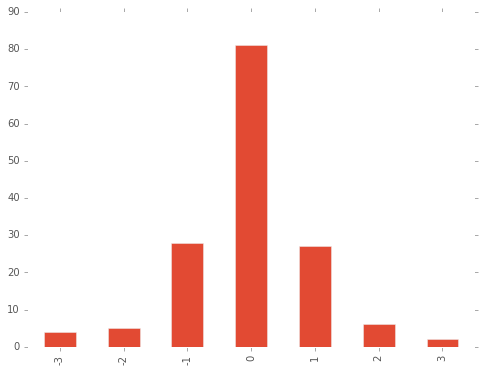

In [63]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
df_dif=pd.DataFrame({'dif':dif})
pylab.rcParams['figure.figsize'] = (8,6)
df_dif.dif.value_counts().sort_index().plot(kind='bar')

In [24]:
precision_dt={}
precision_rf={}
precision_et={}
precision_svm={}
for subject,count in all_subjects.iteritems():
    print subject
    ##load data
    dfx=df_csv[df_csv['COURSEID']==subject]
    dfx=dfx.iloc[np.random.permutation(len(dfx))]
    ##convert to np.array
    x=dfx.as_matrix( dfx.columns[4:] )
    y=dfx.as_matrix( ['GRADE'] ).T[0]
    ##evaluation
    precision_dt[subject]=cross_val_score(clf_dt, x, y, cv=5).mean()
    precision_rf[subject]=cross_val_score(clf_rf, x, y, cv=5).mean()
    precision_et[subject]=cross_val_score(clf_et, x, y, cv=5).mean()
    precision_svm[subject]=cross_val_score(clf_svm, x, y, cv=5).mean()

MA211
CS102
CS101
TU154
TH161
CS111
CS213
EL171
SC135
PY228
EL172
SC185
TU110
CS223
TU120
ST216
CS284
EL295
TU130
MA212
MA332
CS314
CS222
CS214
CS261
CS251
CS281
CS341
EL395
CS301
CS311
CS374
CS302
CS401
CS342
CS105
HO201
CS395
CS402
CS365
EL070
AT326
TU100
CS289
CS385
AT316
CS326
TU122
CS288
CS487
CS211
CS489
SC123
SC173
CS296
CS488
SW111
CS367
SW365
CS486
SW212
CS409
SW221
CS215
CS386
CS366
CS295
CS377
LA209
CS456
CS467
CS300
SW478
SW213
MW314
BA291
SW475
CS396
CS427
ES356
CS387
CS286
CS297
CS429
CS446
SW335
CS356
HR201
CS459
SO201
NS132
TA395
CJ321
CS397
CS398
CS348
CJ317
MW313
CJ316
MA216
CS407
CS115
CS457
CS388
CS426
CS449
CS408
CJ315
CS285
CS399
PY218


ValueError: Cannot have number of folds n_folds=5 greater than the number of samples: 0.

In [25]:
import datetime
import pickle
filename= datetime.datetime.now().strftime("%y%m%d_%H%M")+".pic"
with open(filename, 'wb') as pickleFile:
    mydata=(precision_dt,precision_rf,precision_et,precision_svm)
    pickle.dump(mydata, pickleFile, pickle.HIGHEST_PROTOCOL)
    
with open(filename, 'rb') as pickleFile:
    precision_dt,precision_rf,precision_et,precision_svm = pickle.load(pickleFile)



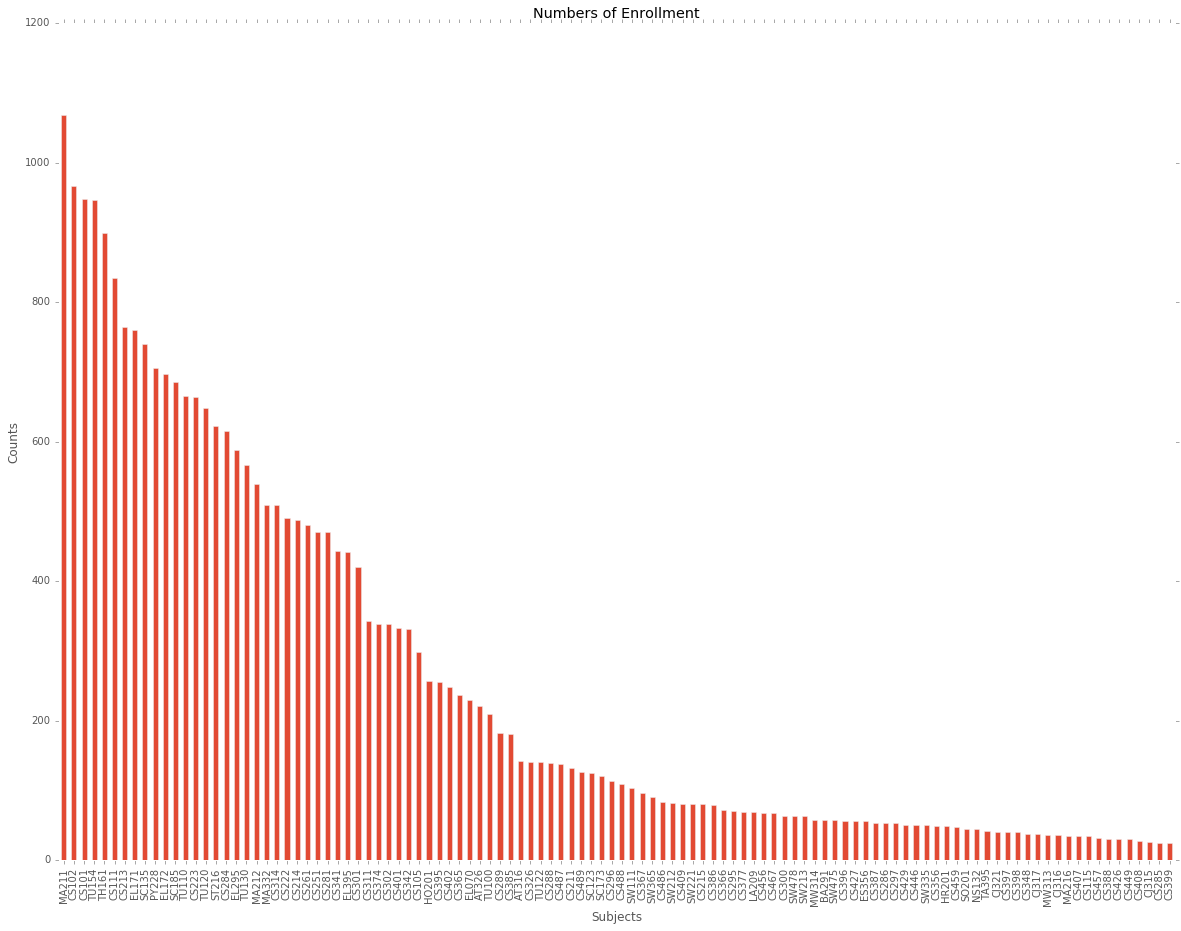

In [64]:
pylab.rcParams['figure.figsize'] = (20,15)
pylab.title("Numbers of Enrollments")
pylab.xlabel("Subjects")
pylab.ylabel("Counts")
m20.plot(kind='bar')

MA211
CS102
CS101
TU154
TH161
CS111
CS213
EL171
SC135
PY228
EL172
SC185
TU110
CS223
TU120
ST216
CS284
EL295
TU130
MA212
MA332
CS314
CS222
CS214
CS261
CS251
CS281
CS341
EL395
CS301
CS311
CS374
CS302
CS401
CS342
CS105
HO201
CS395
CS402
CS365
EL070
AT326
TU100
CS289
CS385
AT316
CS326
TU122
CS288
CS487
CS211
CS489
SC123
SC173
CS296
CS488
SW111
CS367
SW365
CS486
SW212
CS409
SW221
CS215
CS386
CS366
CS295
CS377
LA209
CS456
CS467
CS300
SW478
SW213
MW314
BA291
SW475
CS396
CS427
ES356
CS387
CS286
CS297
CS429
CS446
SW335
CS356
HR201
CS459
SO201
NS132
TA395
CJ321
CS397
CS398
CS348
CJ317
MW313
CJ316
MA216
CS407
CS115
CS457
CS388
CS426
CS449
CS408
CJ315
CS285
CS399


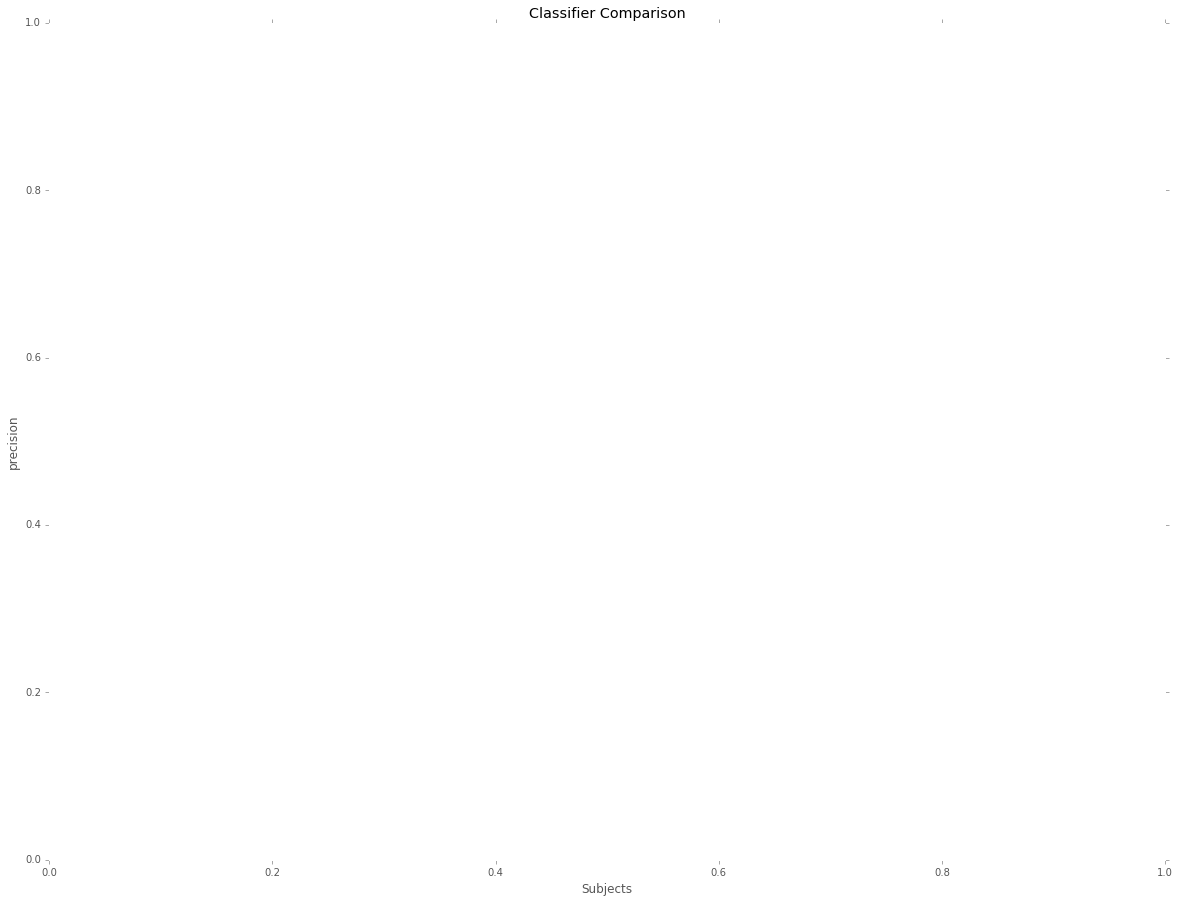

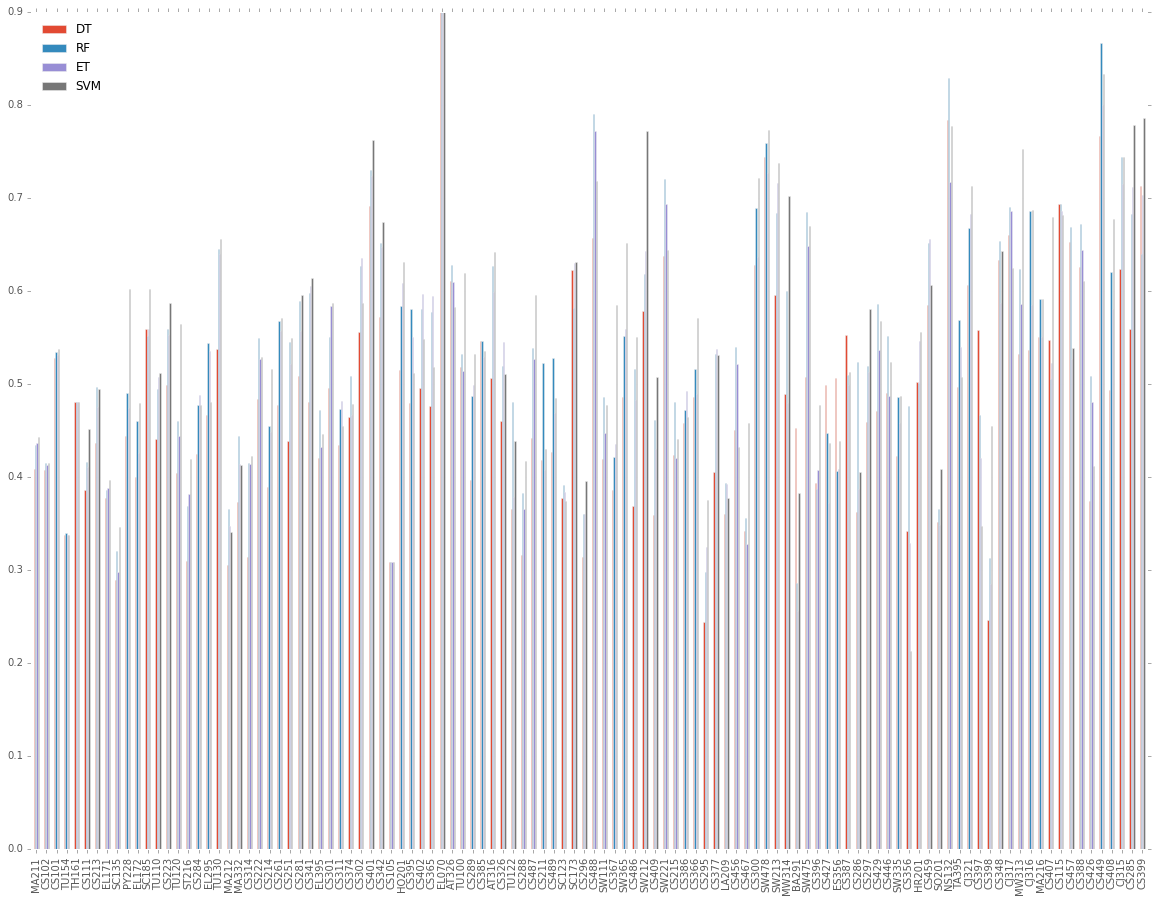

In [69]:
df_precision = pd.DataFrame(m20.copy(), columns=['DT'])
df_precision['RF'] = m20.copy()
df_precision['ET'] = m20.copy()
df_precision['SVM'] = m20.copy()

for subject,count in m20.iteritems():
    print subject
    df_precision['DT'].loc[subject]=precision_dt[subject]
    df_precision['RF'].loc[subject]=precision_rf[subject]
    df_precision['ET'].loc[subject]=precision_et[subject]
    df_precision['SVM'].loc[subject]=precision_svm[subject]
    
pylab.rcParams['figure.figsize'] = (20,15)
pylab.title("Classifier Comparison")
pylab.xlabel("Subjects")
pylab.ylabel("precision")
df_precision.plot(kind='bar')

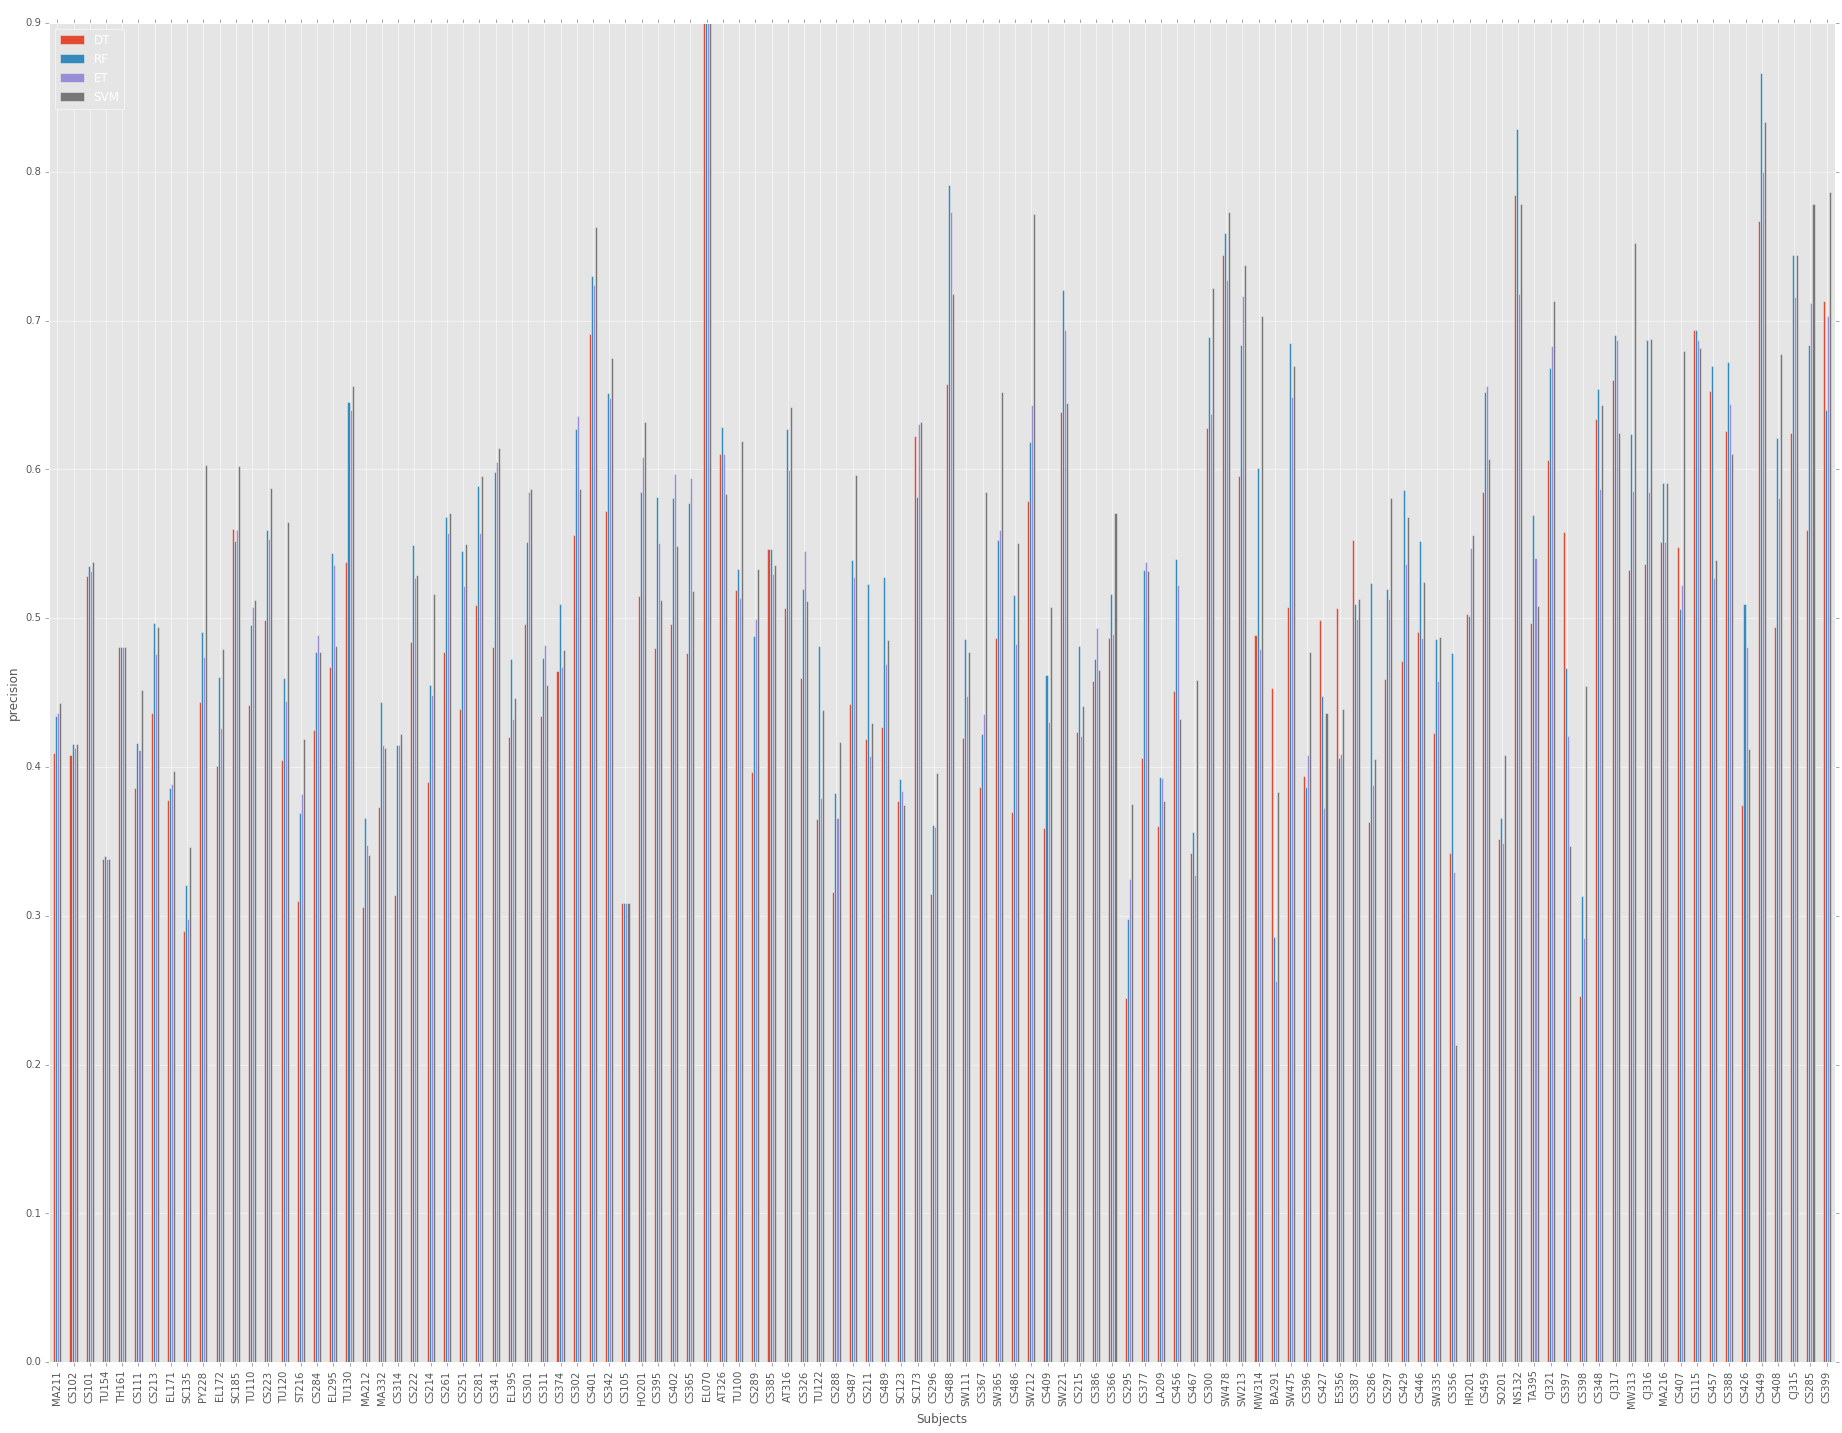

In [92]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df_precision.to_pickle("df_precision.pkl")
df_precision= pd.read_pickle("df_precision.pkl")
pylab.rcParams['figure.figsize'] = (32, 24)

df_precision.plot(kind='bar')
pylab.title("Classifier Comparison")
pylab.xlabel("Subjects")
pylab.ylabel("precision")

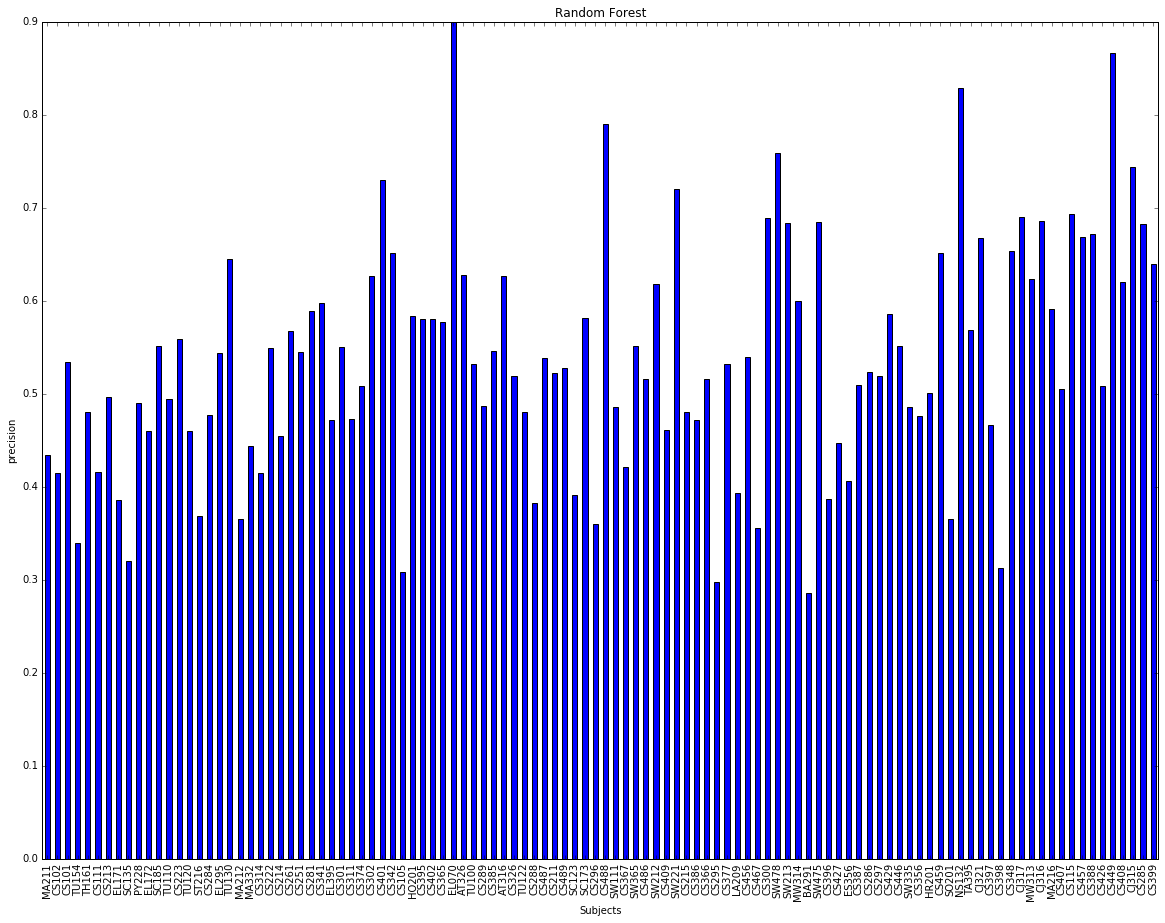

In [60]:
df_precision_rf=m20.copy()
for subject,count in m20.iteritems():
    df_precision_rf.loc[subject]=precision_rf[subject]
pylab.rcParams['figure.figsize'] = (20,15)
pylab.title("Random Forest")
pylab.xlabel("Subjects")
pylab.ylabel("precision")
df_precision_rf.plot(kind='bar')

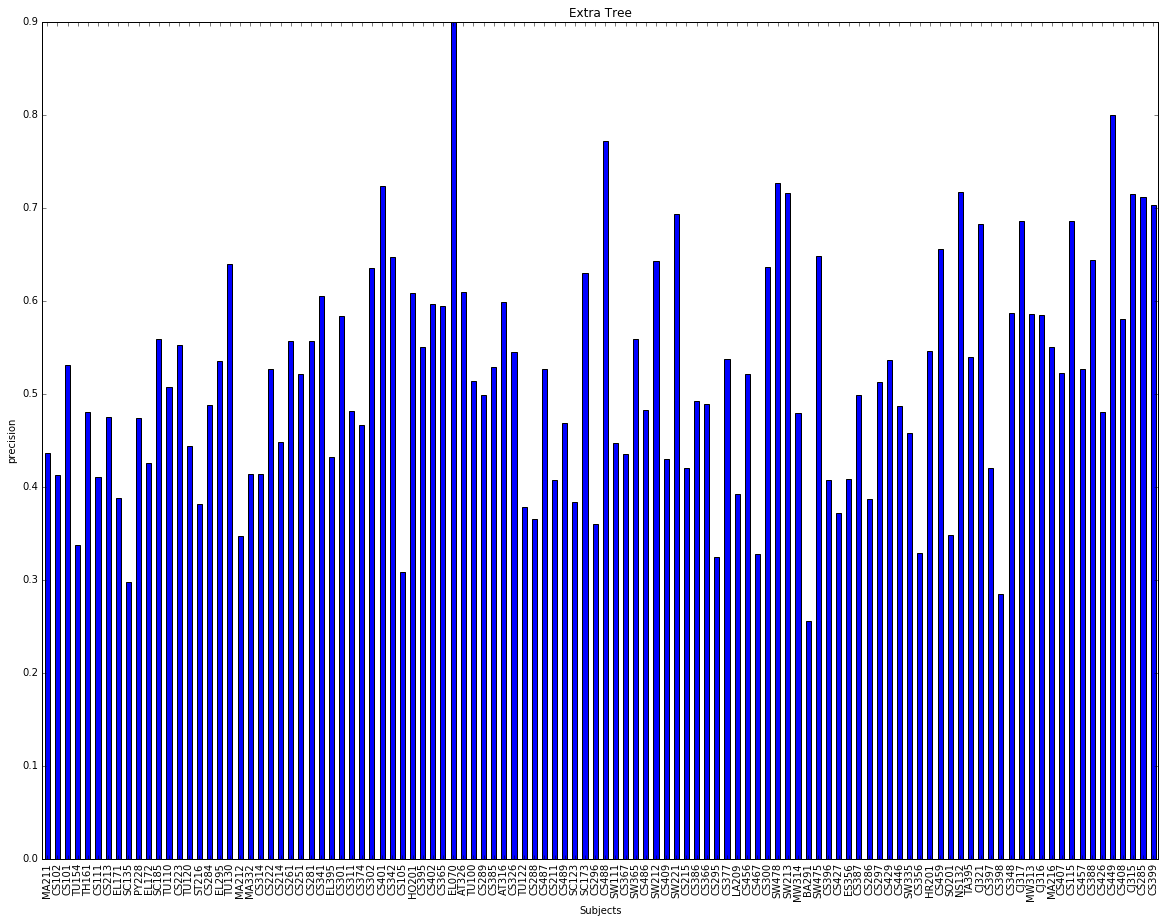

In [61]:
df_precision=pd.DataFrame({})
for subject,count in m20.iteritems():
    df_precision_et.loc[subject]=precision_et[subject]
pylab.rcParams['figure.figsize'] = (20,15)
pylab.title("Extra Tree")
pylab.xlabel("Subjects")
pylab.ylabel("precision")
df_precision_et.plot(kind='bar')

In [50]:
df_csv[df_csv['COURSEID']=='EL070']

,STUDENTID,COURSEID,GRADE,TERM,AN201,AS171,AS177,AS178,AT207,AT316,...,TU110,TU111,TU115,TU116,TU120,TU122,TU130,TU153,TU154,TU156
324,324842,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,325073,EL070,1,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1331,329191,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477,329194,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,329204,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2624,329221,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3383,336701,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3862,336715,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3924,336716,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4113,336720,EL070,2,25521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_csv[df_csv['COURSEID']=='NS132']

,STUDENTID,COURSEID,GRADE,TERM,AN201,AS171,AS177,AS178,AT207,AT316,...,TU110,TU111,TU115,TU116,TU120,TU122,TU130,TU153,TU154,TU156
1146,329187,NS132,7,25533,0,0,0,0,0,0,...,5,0,0,0,6,0,6,0,6,0
1962,329204,NS132,8,25533,0,0,0,0,0,0,...,5,0,0,0,7,0,6,0,8,0
2289,329212,NS132,7,25533,0,0,0,0,0,0,...,5,0,0,0,5,0,7,0,6,0
2600,329219,NS132,8,25533,0,0,0,0,0,0,...,5,0,0,0,7,0,6,0,6,0
2819,329226,NS132,7,25533,0,0,0,0,0,0,...,5,0,0,0,6,0,7,0,6,0
7574,351661,NS132,7,25543,0,0,0,0,0,0,...,7,0,0,0,7,0,6,0,7,0
7796,351665,NS132,7,25553,0,0,0,0,0,7,...,7,0,0,0,7,7,6,0,5,0
8133,351672,NS132,7,25543,0,0,0,0,0,0,...,6,0,0,0,7,0,7,0,6,0
8743,351685,NS132,7,25543,0,0,0,0,0,0,...,6,0,0,0,7,0,6,0,6,0
9171,351695,NS132,7,25543,0,0,0,0,0,0,...,6,0,0,0,7,0,7,0,5,0


MA211    1068
CS102     966
CS101     948
TU154     946
TH161     899
CS111     834
CS213     765
EL171     760
SC135     740
PY228     705
EL172     697
SC185     686
TU110     666
CS223     664
TU120     648
ST216     623
CS284     616
EL295     588
TU130     567
MA212     539
MA332     509
CS314     509
CS222     490
CS214     488
CS261     481
CS251     471
CS281     470
CS341     443
EL395     442
CS301     421
         ... 
CS387      54
CS286      53
CS297      53
CS429      51
CS446      50
SW335      50
CS356      49
HR201      49
CS459      48
SO201      44
NS132      44
TA395      42
CJ321      41
CS397      41
CS398      40
CS348      38
CJ317      37
MW313      36
CJ316      36
MA216      35
CS407      35
CS115      34
CS457      32
CS388      31
CS426      30
CS449      30
CS408      27
CJ315      26
CS285      24
CS399      24
Name: COURSEID, dtype: int64

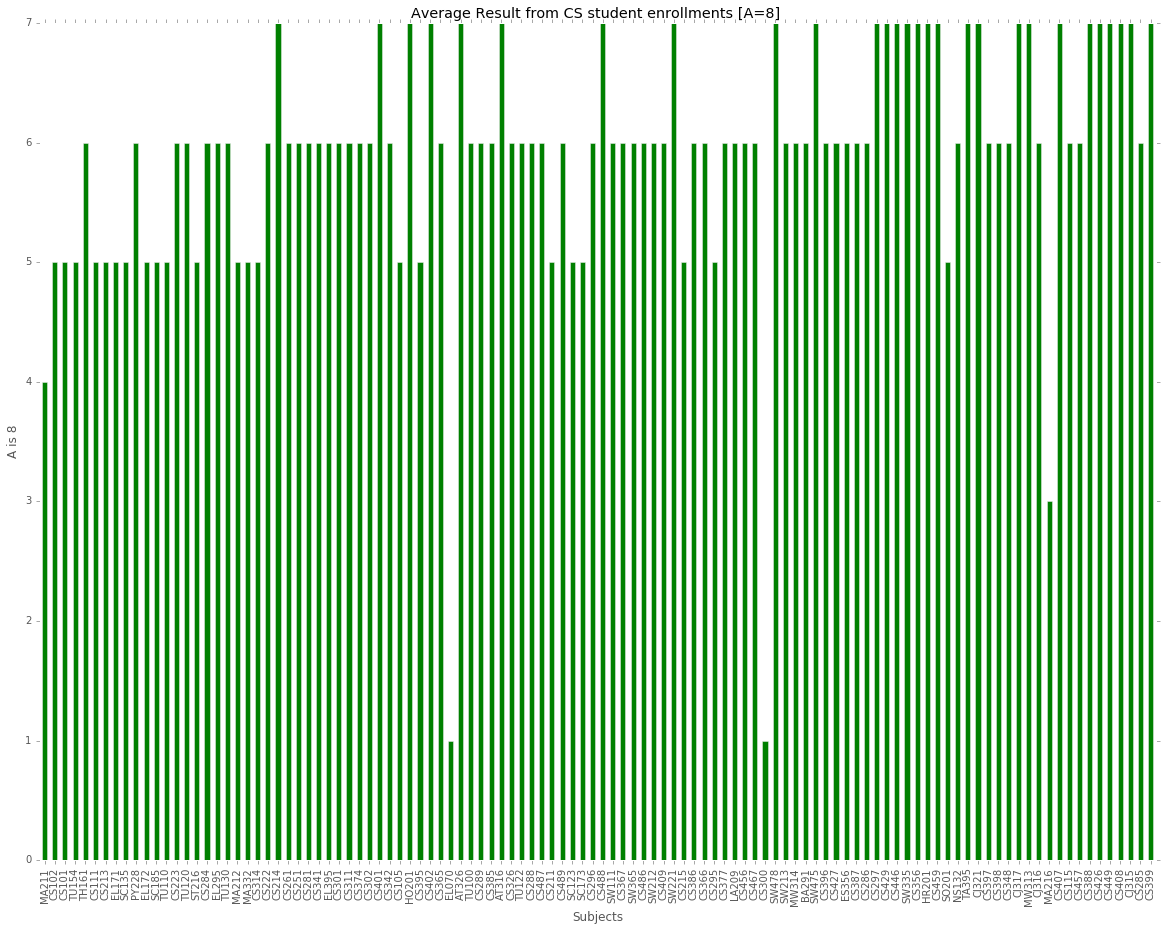

In [82]:
df_grade=m20.copy().astype(float)
for subject,count in m20.iteritems():
    df_grade[subject] = df_csv[df_csv["COURSEID"]==subject]["GRADE"].mean()
pylab.rcParams['figure.figsize'] = (20,15)
pylab.title('''Average Result from CS student enrollments [A=8] ''')
pylab.xlabel("Subjects")
pylab.ylabel("A is 8")
m20.plot(kind='bar',color='green')

In [79]:
df_csv[df_csv["COURSEID"]==subject]["GRADE"].mean()

7.541666666666667